In [144]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


from nltk.tokenize import regexp_tokenize, word_tokenize, TweetTokenizer
from collections import Counter
from datetime import datetime


from sklearn.feature_extraction.text import CountVectorizer

In [145]:
df = pd.read_csv("Palestine-Israel_tweet5.csv")

In [146]:
df2 = df.drop(['Unnamed: 0','username','link'], axis=1)

In [147]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   profile_id  4775 non-null   int64 
 1   date        4775 non-null   object
 2   text        4775 non-null   object
 3   comments    4775 non-null   int64 
 4   likes       4775 non-null   int64 
 5   quotes      4775 non-null   int64 
 6   retweets    4775 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 261.3+ KB


In [148]:
# Define the format of the input string
date_format = '%b %d, %Y · %I:%M %p %Z'

# Convert string to datetime object
str_to_date = lambda u : datetime.strptime(u, date_format)

df2['date'] = df2['date'].apply(str_to_date)

In [149]:
df2

,profile_id,date,text,comments,likes,quotes,retweets
0,1712776952593924096,2023-10-16 04:35:00,The Difference❗ Between War Vs Genocide❗ #Isr...,3,5,0,1
1,1712776952593924096,2023-10-16 04:31:00,🇵🇸🇮🇱🚨 Brave Palestinian lady documenting the o...,0,0,0,0
2,1712776952593924096,2023-10-16 04:31:00,A child from Palestine says what happened to h...,1,1,0,0
3,1712776952593924096,2023-10-16 04:30:00,"No, this devastation is not caused by the eart...",0,2,0,0
4,1712776952593924096,2023-10-16 04:30:00,BREAKING! Israeli warplanes have been continuo...,0,0,0,1
...,...,...,...,...,...,...,...
4770,1752382749153927168,2023-10-07 14:33:00,Such language from the U.K. government and oth...,608,11402,133,3209
4771,1714526492258975744,2023-10-07 13:53:00,President Mahmoud Abbas chairs an emergency le...,2,14,0,3
4772,1714526492258975744,2023-10-07 12:49:00,"Israeli warplanes attack #Gaza, according to l...",3,19,0,5
4773,1714526492258975744,2023-10-07 12:24:00,"Peace requires justice, freedom and independen...",0,5,0,0


In [150]:
df3 = df2.drop(['date','text'],axis=1)
df3['year']=df2['date'].dt.year
df3['month']=df2['date'].dt.month
df3['day']=df2['date'].dt.day

In [151]:
df3

,profile_id,comments,likes,quotes,retweets,year,month,day
0,1712776952593924096,3,5,0,1,2023,10,16
1,1712776952593924096,0,0,0,0,2023,10,16
2,1712776952593924096,1,1,0,0,2023,10,16
3,1712776952593924096,0,2,0,0,2023,10,16
4,1712776952593924096,0,0,0,1,2023,10,16
...,...,...,...,...,...,...,...,...
4770,1752382749153927168,608,11402,133,3209,2023,10,7
4771,1714526492258975744,2,14,0,3,2023,10,7
4772,1714526492258975744,3,19,0,5,2023,10,7
4773,1714526492258975744,0,5,0,0,2023,10,7


In [152]:
df2["text"].values

array(['The Difference❗ Between War Vs Genocide❗  #Israel has killed in 8 days 614 children  in #Gaza according to UN   Where #Russia killed 554 children in 596 days   The Difference of Rate❗ - Russia 0.9 per day - Israel 76.7 per day   #PalestineGenocide #IsrealPalestineconflict',
       '🇵🇸🇮🇱🚨 Brave Palestinian lady documenting the ongoing war crimes committed by #Israel in #Gaza including the usage of white phosphorus .  #HamasTerrorist #hamas #IsraelPalestineConflict #GazzeUnderAttack #PalestineGenocide https://nitter.net/Sa91af/status/1713726867046326719/video/1',
       'A child from Palestine says what happened to him and his family, that the criminal Zionist entity killed them and he was beaten by them.  #GazzeUnderAttack #Isarael #palastine #PalestineGenocide #GazaCity https://nitter.net/H80583330/status/1713721430318133483/video/1',
       ...,
       'Israeli warplanes attack #Gaza, according to local sources #Palestine',
       'Peace requires justice, freedom and independe

In [153]:
count = CountVectorizer(stop_words = 'english')

count_train = count.fit_transform(df2['text'].values)

count.get_feature_names_out()

array(['00', '000', '0000017f', ..., '𝟐𝟒', '𝟕𝐭𝐡', '𝟗𝟗'], dtype=object)

In [154]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords # import English stopwords
stopwords = set(stopwords.words('english'))

import re #used for Regular Expression 
import string
from collections import defaultdict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1>Cleaning functions

In [155]:
# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

test = "Oh non 😔 je suis triste ..."
print(remove_emoji(test))

Oh non  je suis triste ...


In [156]:
# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'',text)

test = "Je mentionne @me ok"
print(remove_mention(test))

Je mentionne  ok


In [157]:
# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'', text)

print(remove_number("13.5"))

In [158]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

test = "Coucou, venez sur https://www.youtube.com/"
print(remove_URL(test))

Coucou, venez sur 


In [159]:
# Factorize repeated punctuation, add REPEAT
def remove_repeat_punct(text):
    rep = re.compile(r'([!?.]){2,}')
    return rep.sub(r'\1', text)

print(remove_repeat_punct("!!!!"))

!


In [160]:
# Factorize elongated words, add ELONG
def remove_elongated_words(text):
    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return rep.sub(r'\1\2', text)

print(remove_elongated_words("yessss"))

yes


In [161]:
# Remove words in capslock, add ALLCAPS
def remove_allcaps(text):
    caps = re.compile(r'([^a-z0-9()<>\'`\-]){2,}')
    return caps.sub(r'', text)

print(remove_allcaps("AAAAHH")) # Can't find how to keep the word in downcase ...

In [162]:
# Remove all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    return text

test = "i am an happy man "
print(remove_stopwords(test))

happy man


In [163]:
# Remove all punctuations
def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

test = "Ceci est, un message ! avec de la . ponctuation " " random "
print(remove_all_punct(test))

Ceci est un message  avec de la  ponctuation  random 


In [164]:
# Remove punctuations
def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')   
    return text

In [165]:
# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

In [279]:
stemmer = PorterStemmer()
# Clean text
def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)      #remove links
    text = remove_not_ASCII(text)      #remove nonsense character
    
    # Lower text, replace abbreviations
    text = text.lower()          #replace all word to lower
    text = remove_mention(text)  #remove @--
    text = remove_number(text)   #remove numbers
    
    # Remove emojis / smileys
    text = remove_emoji(text) 
    
    # Remove repeated puntuations / words
    text = remove_elongated_words(text)    #revomve word repeated like HHHHHH
    text = remove_repeat_punct(text)       #remove repeated punctuation

    text = remove_all_punct(text)          #remove punctuation
    text = remove_punct(text)              #remove other punctuation
    text = remove_stopwords(text)          #remove basic words like (and,or,...)
    
    #Stemming or Lemmatization
    text = lemmatizing2(text)               #replace words to simple (infinitif , singular, ...)
    #text = stemming(text)                  #remove last letters
    
    #My methode of lemmatization
    text =clean_lemma(text)

    return text

In [280]:
df3['text'] = df2['text'].apply(clean_tweet)
df3['text'][2500] #Cleaned text data_tweet

'want shani louk remembered never forget shani may memory blessing'

In [191]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [192]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(text):
    data=text.split(' ')
    data2 = [lemmatizer.lemmatize(word) for word in data]
    text2=' '.join(data2)
    return text2

In [193]:
stemmer = PorterStemmer()
def stemming(text):
    data=text.split(' ')
    data2 = [stemmer.stem(word) for word in data]
    text2=' '.join(data2)
    return text2

In [194]:
df3['text'] = df2['text'].apply(clean_tweet)

In [239]:
!python -m spacy download en_core_web_md

     -------------------------------------- 42.8/42.8 MB 360.8 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


dict_values([['israeli', 'israelis', 'lsrael', 'endisraelsgenocide'], ['palestinian', 'palestinians'], ['gazaunderattack']])

In [278]:
words_model = ['israeli','israelis','lsrael','endisraelsgenocide','palestinian','palestinians','gazaunderattack']
model_language = {'israel':['israeli','israelis','lsrael','endisraelsgenocide'],
                  'palestine':['palestinian','palestinians'],
                 'gaza':['gazaunderattack']}
def clean_lemma(text):
    data = text.split(' ')
    n=len(data)
    i=0
    while i < n:
        if len(data[i])<=2:
            data.pop(i)
            n-=1
        elif data[i] in words_model:
            for key,value in model_language.items():
                if data[i] in value:
                    data[i]=key
                    i+=1
                    break
        else:
            i+=1
    text = ' '.join(data)
    return text
    

In [282]:
texts=''
for text in df3['text']:
    texts=texts+' '+text
test = texts.split(' ')
c=Counter(test)
c.most_common(200)

[('israel', 2187),
 ('gaza', 1906),
 ('palestine', 1147),
 ('ukraine', 719),
 ('hamas', 546),
 ('kill', 491),
 ('day', 485),
 ('people', 418),
 ('russia', 394),
 ('say', 364),
 ('child', 343),
 ('not', 338),
 ('one', 324),
 ('today', 318),
 ('hostage', 304),
 ('iran', 285),
 ('russian', 278),
 ('war', 275),
 ('attack', 273),
 ('family', 265),
 ('world', 261),
 ('hospital', 259),
 ('terrorist', 250),
 ('force', 249),
 ('october', 247),
 ('kyiv', 239),
 ('genocide', 223),
 ('break', 221),
 ('take', 220),
 ('call', 215),
 ('home', 213),
 ('international', 208),
 ('aid', 198),
 ('hold', 197),
 ('woman', 192),
 ('support', 190),
 ('ambassador', 184),
 ('civilian', 179),
 ('report', 178),
 ('state', 175),
 ('must', 171),
 ('time', 162),
 ('murder', 161),
 ('year', 159),
 ('bomb', 155),
 ('military', 152),
 ('president', 152),
 ('humanitarian', 152),
 ('right', 151),
 ('every', 150),
 ('ceasefire', 150),
 ('use', 147),
 ('continue', 145),
 ('foreign', 145),
 ('include', 143),
 ('zionist', 141

In [240]:
import spacy
 
# Load the spaCy English model
nlp = spacy.load('en_core_web_md')
 
# Define a sample text
text = "The quick brown foxes are jumping over the lazy dogs."
 
# Process the text using spaCy
doc = nlp(text)
 
# Extract lemmatized tokens
lemmatized_tokens = [token.lemma_ for token in doc]
 
# Join the lemmatized tokens into a sentence
lemmatized_text = ' '.join(lemmatized_tokens)
 
# Print the original and lemmatized text
print("Original Text:", text)
print("Lemmatized Text:", lemmatized_text)

Original Text: The quick brown foxes are jumping over the lazy dogs.
Lemmatized Text: the quick brown fox be jump over the lazy dog .


In [241]:
import spacy

nlp = spacy.load('en_core_web_md')

def lemmatizing2(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Extract lemmatized tokens
    lemmatized_tokens = [token.lemma_ for token in doc]

    # Join the lemmatized tokens into a sentence
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [110]:
!pip install textblob

In [111]:
from textblob import TextBlob

In [112]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [113]:
df3['sentiment_polarity']=df3['text'].apply(polarity)

In [114]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [115]:
df3['sentiment']=df3['sentiment_polarity'].apply(sentiment)

In [126]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   profile_id          4775 non-null   int64  
 1   comments            4775 non-null   int64  
 2   likes               4775 non-null   int64  
 3   quotes              4775 non-null   int64  
 4   retweets            4775 non-null   int64  
 5   year                4775 non-null   int64  
 6   month               4775 non-null   int64  
 7   day                 4775 non-null   int64  
 8   text                4775 non-null   object 
 9   sentiment_polarity  4775 non-null   float64
 10  sentiment           4775 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 410.5+ KB


In [117]:
df3.to_csv('Palestine-Israel_tweet6.csv')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

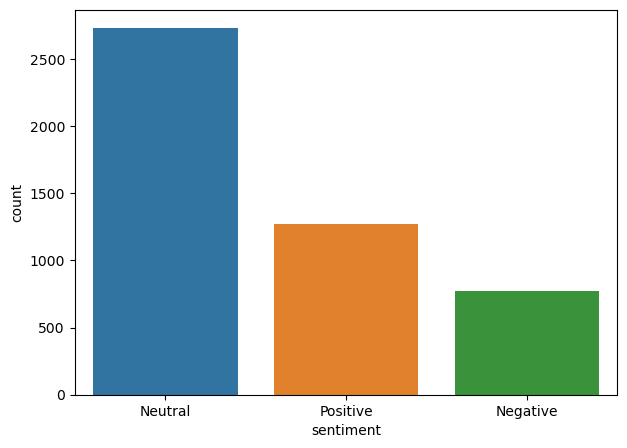

In [81]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x="sentiment",data=df3)

In [273]:
len('')

0

,test
0,1


In [281]:
count = CountVectorizer(stop_words = 'english')

count_train = count.fit_transform(df3['text'].values)

len(list(count.get_feature_names_out()))

8374

In [79]:
count_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
df3['text'][2500] #Cleaned text data_tweet

'want shani louk remembered never forget shani may memory blessing'

In [140]:
stemming("behindthescenes")

'behindthescen'

In [185]:
print("rocks :", lemmatizer.lemmatize("walked"))

rocks : walked
